In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

%matplotlib inline

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [594]:
df=pd.read_csv('cubic_zirconia.csv').drop('Unnamed: 0',axis=1)

In [595]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [596]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [598]:
df.shape

(26967, 10)

In [599]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [600]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [601]:
##Imputing null values with median value of depth variable
df['depth'] = df['depth'].fillna(df['depth'].median())

In [602]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [603]:
df.duplicated().sum()

34

In [606]:
## Dropping duplicates
df.drop_duplicates(inplace=True)

In [607]:
df.duplicated().sum()

0

In [608]:
df.shape

(26933, 10)

In [85]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [98]:
df.shape

(26933, 10)

In [609]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.746701,1.393875,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [610]:
for feature in df.columns:
    if df[feature].dtype=='object':
        print(feature)
        print(df[feature].value_counts())
        print('\n')
    

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




Univariate Analysis

In [611]:
import warnings
warnings. filterwarnings('ignore')

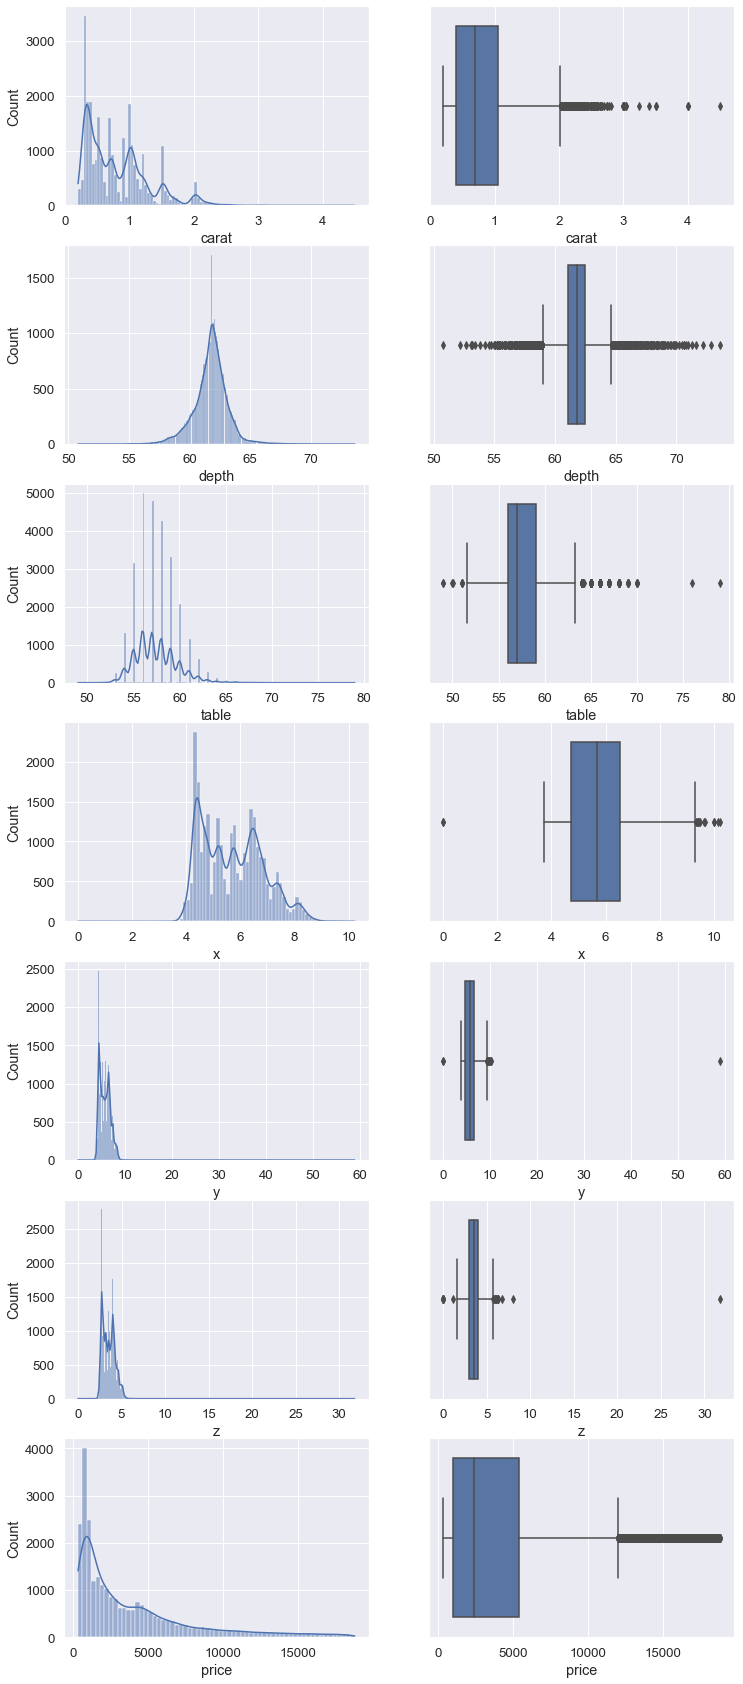

In [612]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12,30)
sns.histplot(df['carat'], kde=True, ax=axes[0][0])
sns.boxplot(x='carat', data=df, ax=axes[0][1])
sns.histplot(df['depth'] , kde=True, ax=axes[1][0])
sns.boxplot(x='depth', data=df , ax=axes[1][1])
sns.histplot(df['table'], kde=True, ax=axes[2][0])
sns.boxplot(x='table',data=df, ax=axes[2][1])
sns.histplot(df['x'] , kde=True, ax=axes[3][0])
sns.boxplot(x='x', data=df , ax=axes[3][1])
sns.histplot(df['y'], kde=True, ax=axes[4][0])
sns.boxplot(x='y', data=df, ax=axes[4][1])
sns.histplot(df['z'] , kde=True, ax=axes[5][0])
sns.boxplot(x='z', data=df , ax=axes[5][1])
sns.histplot(df['price'], kde=True, ax=axes[6][0])
sns.boxplot(x='price', data=df, ax=axes[6][1])
plt.show()

In [35]:
df.skew()

carat    1.114871
depth   -0.028403
table    0.764890
x        0.402010
y        3.888607
z        2.639529
price    1.619055
dtype: float64

<AxesSubplot:xlabel='cut', ylabel='count'>

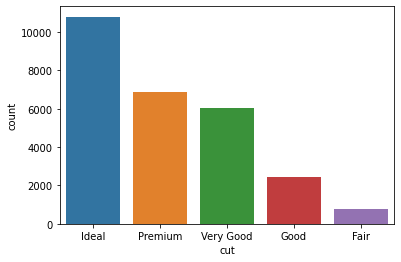

In [64]:
sns.countplot(x='cut',data=df)

<AxesSubplot:xlabel='color', ylabel='count'>

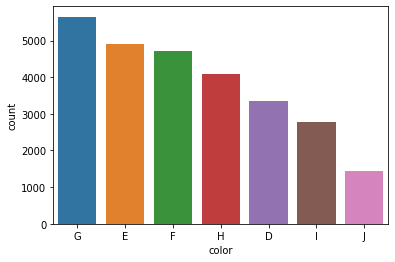

In [43]:
sns.countplot(x='color',data=df,order=df.color.value_counts().index)

<AxesSubplot:xlabel='clarity', ylabel='count'>

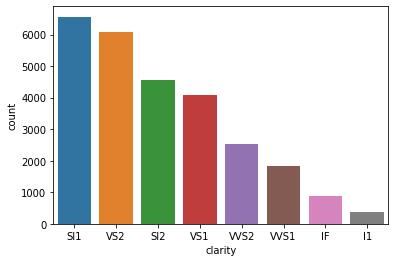

In [44]:
sns.countplot(x='clarity',data=df,order=df.clarity.value_counts().index)

<AxesSubplot:xlabel='clarity', ylabel='price'>

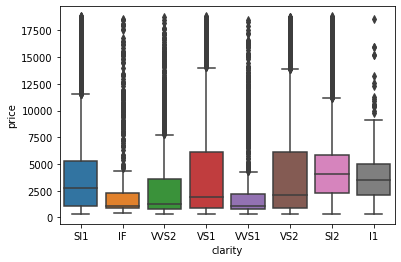

In [72]:
sns.boxplot(x='clarity', y = 'price', data=df)

<AxesSubplot:xlabel='cut', ylabel='price'>

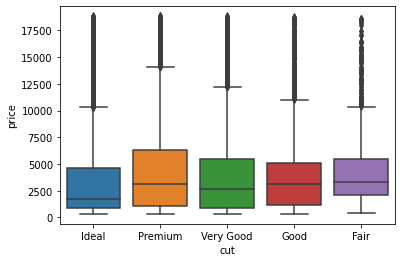

In [74]:
sns.boxplot(x='cut', y = 'price', data=df)

<AxesSubplot:xlabel='color', ylabel='price'>

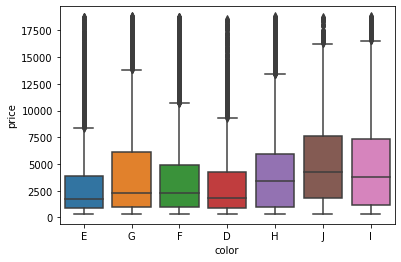

In [27]:
sns.boxplot(x='color', y = 'price', data=df)

In [613]:
def replace_outlier(col):
    Q1, Q3 = np.quantile(col, [.25, .75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL, UL

In [614]:
#Cap & floor the values beyond the outlier boundaries
feature_list = ['carat','depth','table','x','y','z','price']
for i in feature_list:
    LL, UL = replace_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

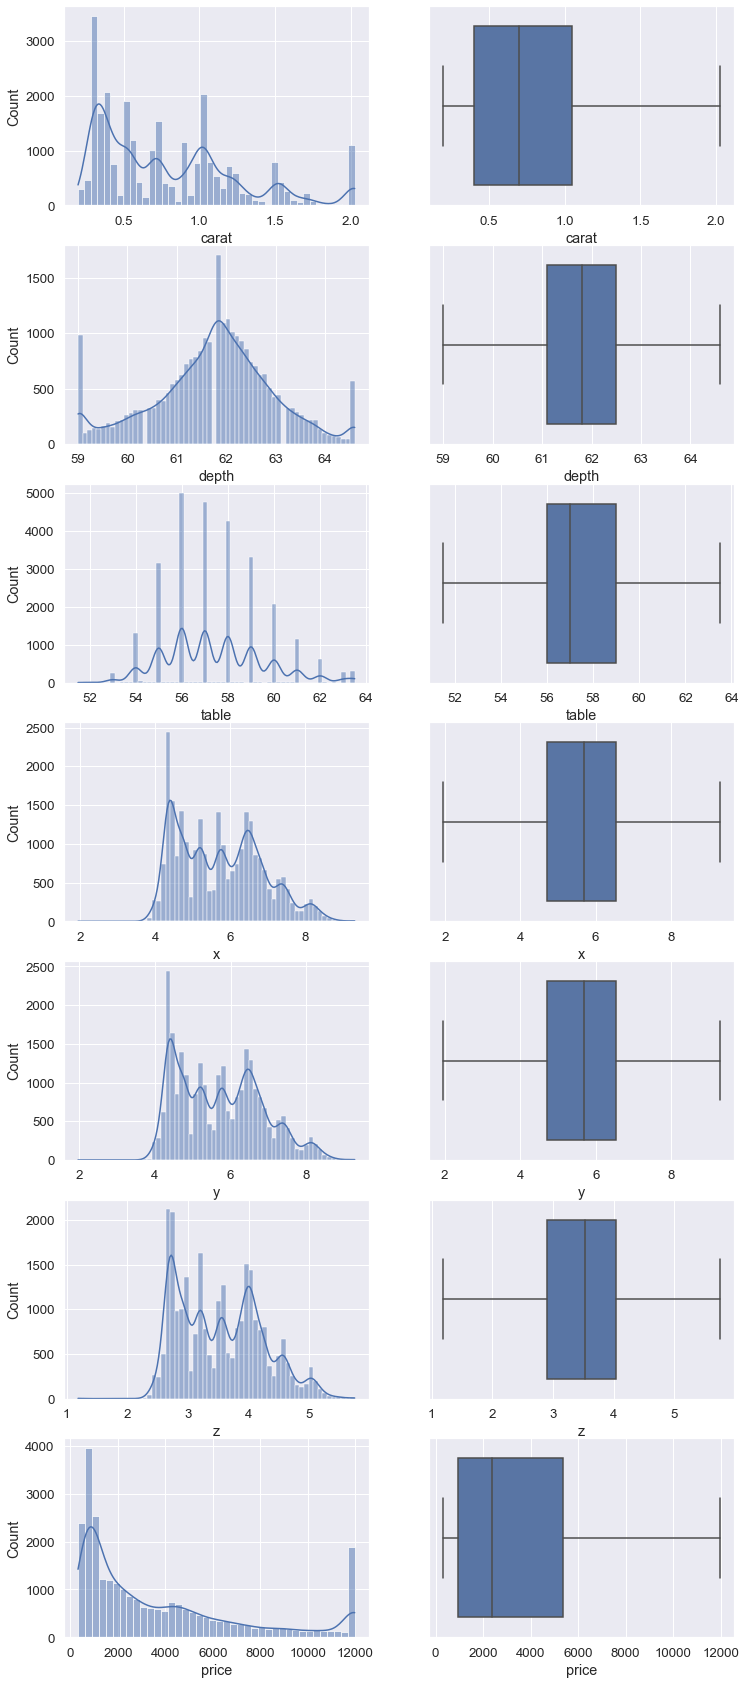

In [615]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12,30)
sns.histplot(df['carat'], kde=True, ax=axes[0][0])
sns.boxplot(x='carat', data=df, ax=axes[0][1])
sns.histplot(df['depth'] , kde=True, ax=axes[1][0])
sns.boxplot(x='depth', data=df , ax=axes[1][1])
sns.histplot(df['table'], kde=True, ax=axes[2][0])
sns.boxplot(x='table',data=df, ax=axes[2][1])
sns.histplot(df['x'] , kde=True, ax=axes[3][0])
sns.boxplot(x='x', data=df , ax=axes[3][1])
sns.histplot(df['y'], kde=True, ax=axes[4][0])
sns.boxplot(x='y', data=df, ax=axes[4][1])
sns.histplot(df['z'] , kde=True, ax=axes[5][0])
sns.boxplot(x='z', data=df , ax=axes[5][1])
sns.histplot(df['price'], kde=True, ax=axes[6][0])
sns.boxplot(x='price', data=df, ax=axes[6][1])
plt.show()

In [616]:
df.skew()

carat    0.917162
depth   -0.194653
table    0.480121
x        0.395196
y        0.391510
z        0.384522
price    1.157688
dtype: float64

In [617]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.029433,0.187143,0.982387,0.981464,0.977508,0.936762
depth,0.029433,1.000000,-0.289357,-0.019848,-0.022884,0.095253,-0.001060
table,0.187143,-0.289357,1.000000,0.199061,0.193428,0.159380,0.137880
x,0.982387,-0.019848,0.199061,1.000000,0.998491,0.988168,0.912933
y,0.981464,-0.022884,0.193428,0.998491,1.000000,0.987841,0.914361
z,0.977508,0.095253,0.159380,0.988168,0.987841,1.000000,0.905866
price,0.936762,-0.001060,0.137880,0.912933,0.914361,0.905866,1.000000


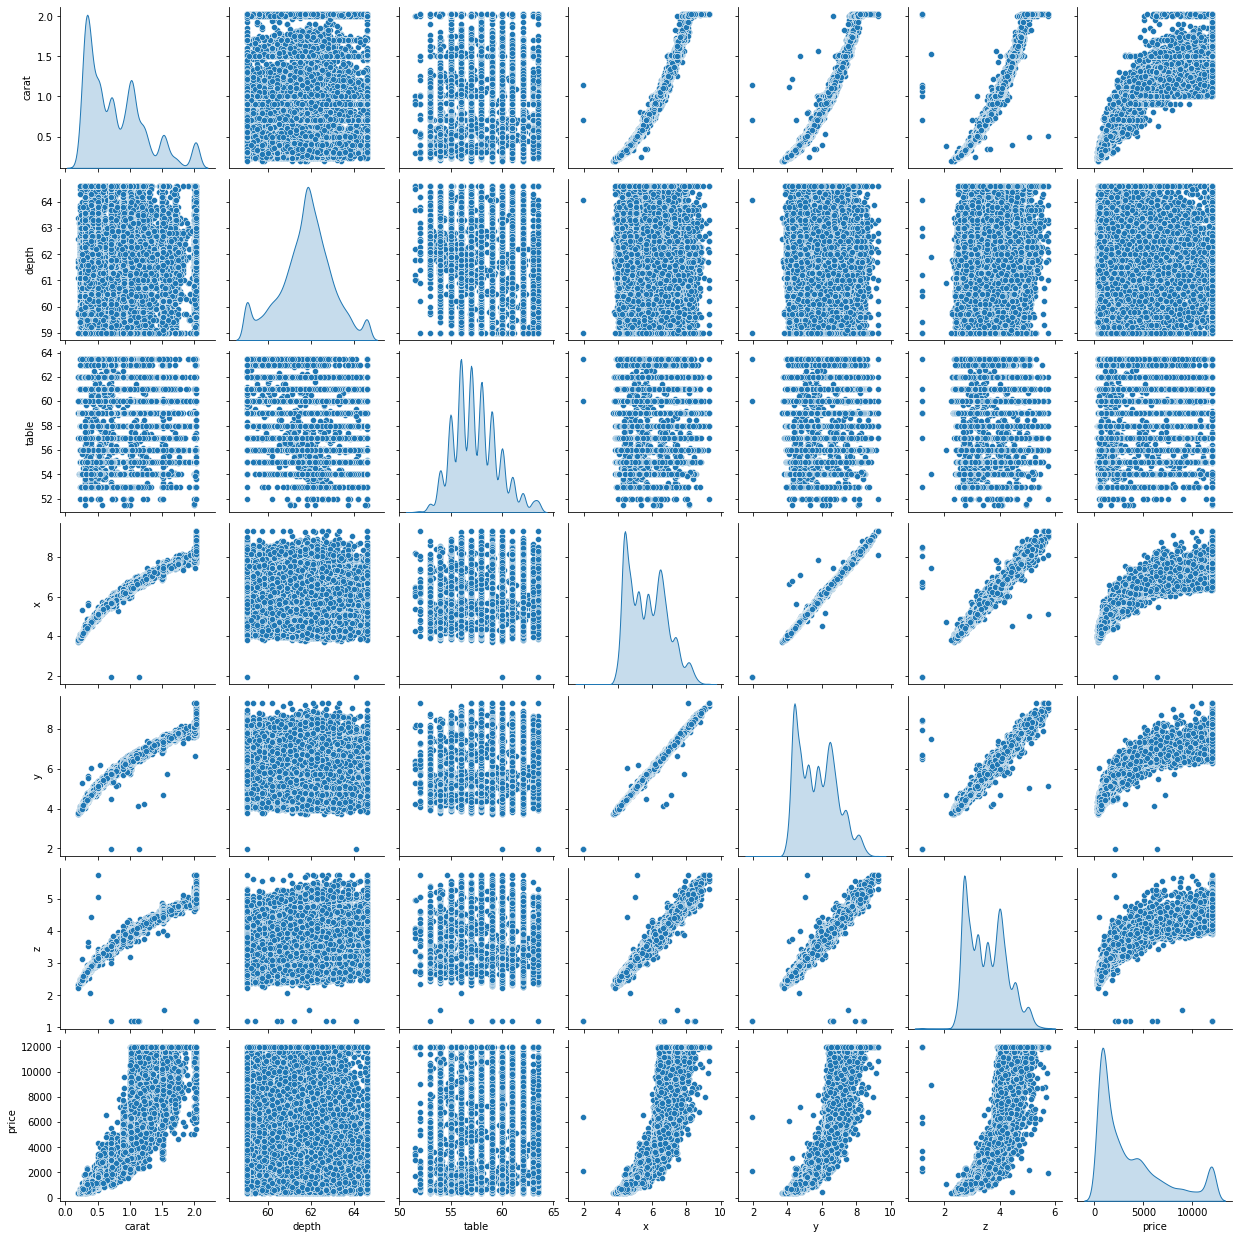

In [19]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
strong positive correlation seen between price-carat,price-x,price-y,price-z .So,carat,x,y,z can be a good predictors for price.
Where as depth and table does not show any correlation with price.
We also see that there exists a strong correlation between x,y,z which leads to multicollinearity in the data.
We also observe some hetroscadasity in the carat-price correlation.

<AxesSubplot:>

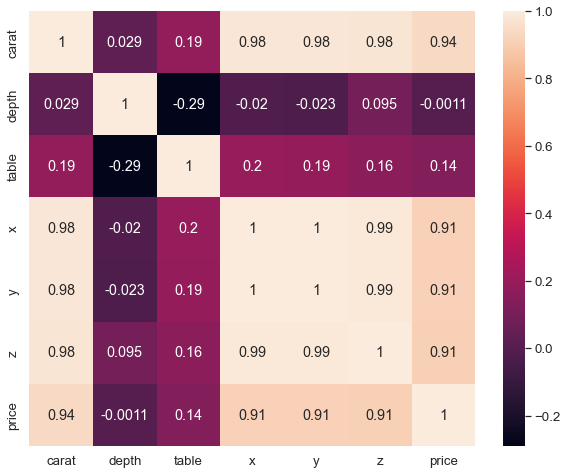

In [20]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),annot=True)

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [618]:
df[df['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [155]:
df['x'].replace(0, np.nan, inplace = True)
df['y'].replace(0, np.nan, inplace = True)
df['z'].replace(0, np.nan, inplace = True)
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
As observed zero values in x,y,z varables were treated as an outlers and capped in outlier treatment

In [619]:
## We are grouping certain types of 'workclass' under different categories

df['cut']=np.where(df['cut'] =='Very Good', 'Good', df['cut'])



In [620]:
## We are grouping certain types of 'workclass' under different categories

df['clarity']=np.where(df['clarity'] =='VVS2', 'VVS1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', 'VS1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', 'SI1', df['clarity'])

In [621]:
for feature in df.columns:
    if df[feature].dtype=='object':
        print(feature)
        print(df[feature].value_counts())
        print('\n')

cut
Ideal      10805
Good        8462
Premium     6886
Fair         780
Name: cut, dtype: int64


color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
SI1     11129
VS1     10180
VVS1     4369
IF        891
I1        364
Name: clarity, dtype: int64




### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning

In [622]:
## We are coding up the 'cut' variable in an ordinal manner

df['cut']=np.where(df['cut'] =='Fair', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3',df['cut'])
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])


In [623]:
## We are coding up the 'color' variable in an ordinal manner

df['color']=np.where(df['color'] =='D', '1', df['color'])
df['color']=np.where(df['color'] =='E', '2', df['color'])
df['color']=np.where(df['color'] =='F', '3', df['color'])
df['color']=np.where(df['color'] =='G', '4', df['color'])
df['color']=np.where(df['color'] =='H', '5', df['color'])
df['color']=np.where(df['color'] =='I', '6', df['color'])
df['color']=np.where(df['color'] =='J', '7', df['color'])

In [624]:
## We are coding up the 'clarity' variable in an ordinal manner

df['clarity']=np.where(df['clarity'] =='IF', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '5', df['clarity'])


In [625]:
df['color'].unique()

array(['2', '4', '3', '1', '5', '7', '6'], dtype=object)

In [626]:
df['cut'].unique()

array(['4', '3', '2', '1'], dtype=object)

In [627]:
df['clarity'].unique()

array(['4', '1', '2', '3', '5'], dtype=object)

In [628]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,2,4,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,4,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,2,2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,3,3,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,3,2,60.4,59.0,4.35,4.43,2.65,779.0


In [629]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,3,4,4,62.3,58.0,6.61,6.52,4.09,5408.0
26963,0.33,4,5,1,61.9,55.0,4.44,4.42,2.74,1114.0
26964,0.51,3,2,3,61.7,58.0,5.12,5.15,3.17,1656.0
26965,0.27,2,3,2,61.8,56.0,4.19,4.20,2.60,682.0
26966,1.25,3,7,4,62.0,58.0,6.90,6.88,4.27,5166.0


In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


In [631]:
df['cut'] = df['cut'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.3+ MB


In [632]:
df['color'] = df['color'].astype('int64')

In [633]:
df['clarity'] = df['clarity'].astype('int64')

In [634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.3 MB


In [635]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = df.drop('price', axis=1)


# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = df[['price']]

In [41]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4,2,4,62.1,58.0,4.27,4.29,2.66
1,0.33,3,4,1,60.8,58.0,4.42,4.46,2.70
2,0.90,2,2,2,62.2,60.0,6.04,6.12,3.78
3,0.42,4,3,3,61.6,56.0,4.82,4.80,2.96
4,0.31,4,3,2,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,3,4,4,62.3,58.0,6.61,6.52,4.09
26963,0.33,4,5,1,61.9,55.0,4.44,4.42,2.74
26964,0.51,3,2,3,61.7,58.0,5.12,5.15,3.17
26965,0.27,2,3,2,61.8,56.0,4.19,4.20,2.60


In [38]:
y

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0
...,...
26962,5408.0
26963,1114.0
26964,1656.0
26965,682.0


In [636]:
### Splitting data(70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [637]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [638]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8819.772196565998
The coefficient for cut is 111.02811022707431
The coefficient for color is -266.3363695601245
The coefficient for clarity is -803.02042153748
The coefficient for depth is -20.692132945841955
The coefficient for table is -19.36563309284415
The coefficient for x is -1514.3434632221201
The coefficient for y is 1309.459539049839
The coefficient for z is -296.8188540673907


For every 1 unit increase in carat,price is going increase by 8806,for every one unit increase in color price is going to decrease by 266 rs

In [639]:
intercept=regression_model.intercept_[0]
intercept

4558.1247975661745

This intercept value does not have any physical meaning

In [640]:
#Coefficient of determinant/R^2
regression_model.score(X_train, y_train)

0.9270195331694963

In [641]:
 regression_model.score(X_test, y_test)

0.9278814375416753

In [116]:
mse_train = np.mean((regression_model.predict(X_train)-y_train)**2)

In [120]:
import math

math.sqrt(mse_train)

936.2375947147045

In [118]:
mse_test = np.mean((regression_model.predict(X_test)-y_test)**2)

In [119]:
import math

math.sqrt(mse_test)

932.9361599151166

Model looks right fit as train and test data performs equally well

# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [121]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2,5,3,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4,2,3,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4,4,4,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,2,2,4,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3,3,4,61.1,62.0,6.54,6.49,3.98,4057.0


In [122]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    4558.124798
carat        8819.772197
cut           111.028110
color        -266.336370
clarity      -803.020422
depth         -20.692133
table         -19.365633
x           -1514.343463
y            1309.459539
z            -296.818854
dtype: float64

In [123]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.659e+04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:04:46   Log-Likelihood:            -1.5574e+05
No. Observations:               18853   AIC:                         3.115e+05
Df Residuals:                   18843   BIC:                         3.116e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4558.1248    711.547      6.406      0.0

P value analysis talks about whether there is a correlation between our independent variables and dependant variables.
This is verified by hypothesis testing where Ho =there is no correlation between dependent and independant variable.
In the above summary for depth we have p value as 0.2 which is greater than 0.05 that means we fail to reject the null hypothesis.
that there is no correlation between depth and price which also confirms from pairplot and heatmap.Other values seems to be good correlation based on above analysis.

std err column above is how far the coffiecients are from the centre value of the distribution.
the tighter the standard error the better the model

The prob(JB) also shows 0 which is less than 0.05,proving that the model is reliable

In [134]:
# Let us check the sum of squared errors by predicting value of y for train cases and 
# subtracting from the actual y for the train cases

mse = np.mean((regression_model.predict(X_train)-y_train)**2)

In [137]:
import math

math.sqrt(mse)

936.2375947147045

In [138]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_train, y_train)

0.9270195331694963

In [129]:
### Stats model for test data
data_test = pd.concat([X_test, y_test], axis=1)
data_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
16997,1.26,3,6,4,60.5,62.0,6.97,6.92,4.20,5292.0
24457,0.90,2,4,3,59.0,59.0,6.35,6.36,3.72,4484.0
16612,1.37,4,3,3,59.6,57.0,7.28,7.22,4.32,11649.0
308,0.84,2,4,3,63.6,57.0,5.98,5.93,3.79,3316.0
26652,2.00,2,7,3,60.8,62.0,8.09,8.12,4.93,11972.5


In [131]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_test).fit()
lm1.params

Intercept    3518.789336
carat        8587.295618
cut           108.365447
color        -254.669232
clarity      -777.370307
depth         -11.211257
table         -17.302488
x           -1449.049694
y            1400.137850
z            -439.893426
dtype: float64

In [132]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.156e+04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:13:06   Log-Likelihood:                -66711.
No. Observations:                8080   AIC:                         1.334e+05
Df Residuals:                    8070   BIC:                         1.335e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3518.7893   1096.898      3.208      0.0

In [124]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [55]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

932.9361599151166

In [136]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9278814375416753

In [139]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

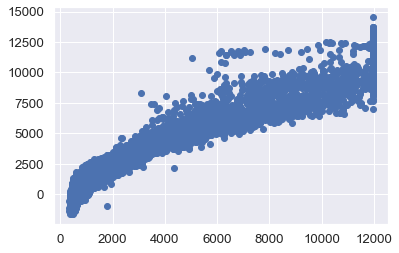

In [140]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['price'], y_pred)

In [72]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


# Model with Scaled Independant and Dependant varaibles

In [141]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [142]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [143]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.170966048204273
The coefficient for cut is 0.02908677500773635
The coefficient for color is -0.1309313372609392
The coefficient for clarity is -0.19607429408524166
The coefficient for depth is -0.0072261312911761685
The coefficient for table is -0.012034186936838453
The coefficient for x is -0.49032945063539246
The coefficient for y is 0.4210549800904407
The coefficient for z is -0.05946417855433392


In [146]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.1755547582564172e-16


In [147]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_train_scaled, y_train_scaled)

0.9270195331694963

In [154]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9278869545808909

In [156]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_train_scaled)-y_train_scaled)**2)

In [157]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.2701489715518162

In [148]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [149]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.26853872238302817

In [152]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

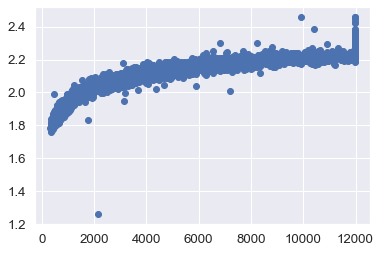

In [642]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values

plt.scatter(y_test['price'], y_pred)

In [ ]:
### Scaling did not have any impact on scores ,it only has effect on coefficients.

# Model with log transformed  Dependant varaible

In [164]:
y=np.log(y)

carat ---> 113.19331302532628
cut ---> 14.975647014088297
color ---> 6.089221446900358
clarity ---> 18.57304197763066
depth ---> 978.8960238318936
table ---> 768.5864728380335
x ---> 10322.985812715433
y ---> 9274.914552219288
z ---> 1960.0358465557526


In [165]:
y

,price
0,1.826580
1,1.930307
2,2.168660
3,1.943989
4,1.895821
...,...
26962,2.151254
26963,1.948152
26964,2.003122
26965,1.875645


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [167]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
22114,0.34,2,5,3,62.4,60.0,4.41,4.44,2.76
2275,0.30,4,2,3,61.2,55.0,4.35,4.31,2.65
19183,0.50,4,4,4,62.5,57.0,5.09,5.05,3.17
5030,1.10,2,2,4,63.3,56.0,6.53,6.58,4.15
25414,1.02,3,3,4,61.1,62.0,6.54,6.49,3.98


In [169]:
y_train.head()

,price
22114,1.838325
2275,1.907786
19183,1.963310
5030,2.117480
25414,2.117243


In [171]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [173]:
regression_model.score(X_train, y_train)

0.9647228269834275

In [177]:
regression_model.score(X_test, y_test)

0.9637004780893621

In [179]:
y_pred = regression_model.predict(X_test)

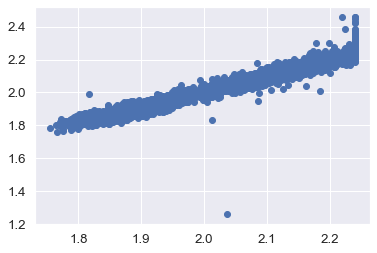

In [181]:
plt.scatter(y_test['price'], y_pred)

In [ ]:
scatter plot looks perfect linear with no spread or hetroscadicity behaviour

In [182]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3518.79) * Intercept + (8587.3) * carat + (108.37) * cut + (-254.67) * color + (-777.37) * clarity + (-11.21) * depth + (-17.3) * table + (-1449.05) * x + (1400.14) * y + (-439.89) * z + 

# Logistic Regression and LDA

###1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis

In [643]:
hol=pd.read_csv("Holiday_Package_N.csv")

In [644]:
hol.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [645]:
hol.drop('Unnamed: 0',axis=1,inplace=True)

In [189]:
hol.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [646]:
hol.shape

(872, 7)

There are 872 rows and 7 columns

In [193]:
hol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


There are 872 observations with 7 columns.No null values present in data.r integer type and 2 object type.

In [648]:
hol.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

No null values present in data

In [198]:
dups = hol.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(hol.shape)

Number of duplicate rows = 0
(872, 7)


There are no duplicate values present in data

In [200]:
hol.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [649]:
for feature in hol.columns: 
    if hol[feature].dtype == 'object': 
        print(feature)
        print(hol[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




### Univariate Analysis-Continuous

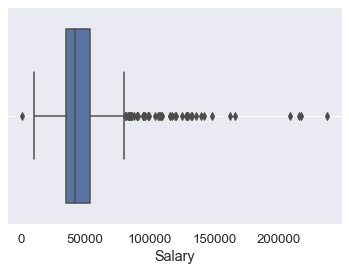

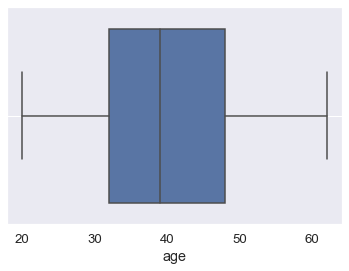

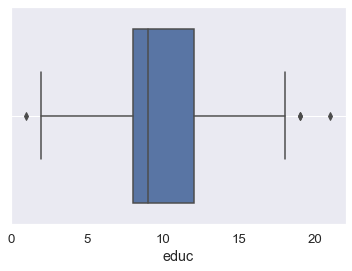

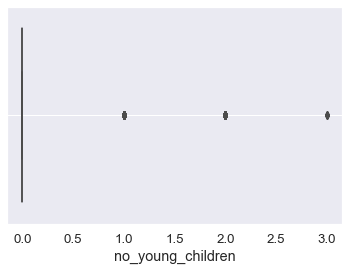

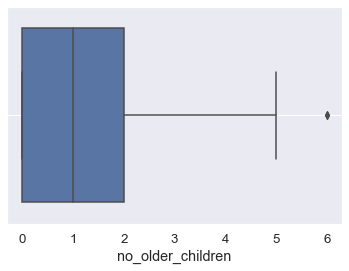

In [204]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(hol[i])
    plt.grid()
    plt.show();

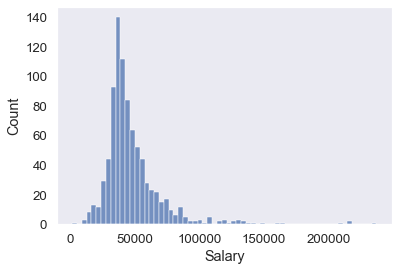

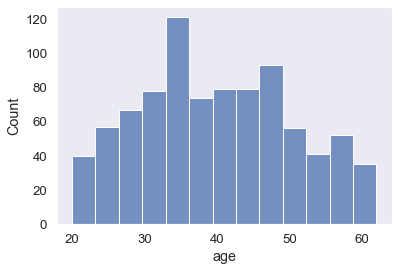

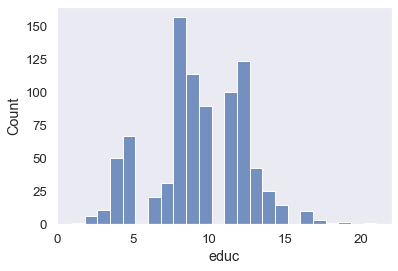

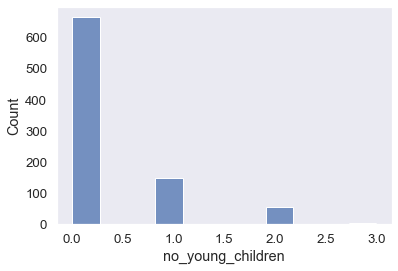

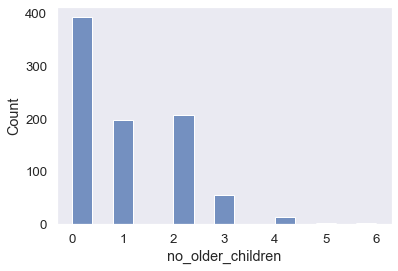

In [206]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.histplot(hol[i])
    plt.grid()
    plt.show();

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

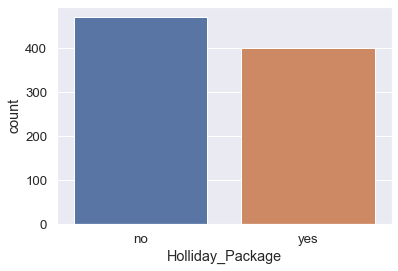

In [208]:
## Univariate Analysis- Categorical
sns.countplot('Holliday_Package',data=hol)

<AxesSubplot:xlabel='foreign', ylabel='count'>

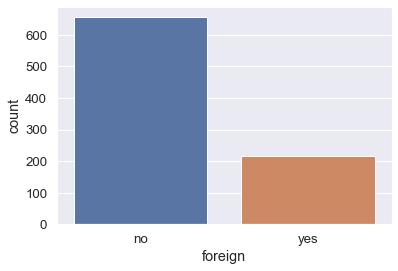

In [210]:
sns.countplot('foreign',data=hol)

In [650]:
hol.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

###Outlier Treatment

In [651]:
def replace_outlier(col):
    Q1, Q3 = np.quantile(col, [.25, .75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL, UL

In [652]:
#Cap & floor the values beyond the outlier boundaries
feature_list = ['Salary','age','educ','no_young_children','no_older_children']
for i in feature_list:
    LL, UL = replace_outlier(hol[i])
    hol[i] = np.where(hol[i] > UL, UL, hol[i])
    hol[i] = np.where(hol[i] < LL, LL, hol[i])

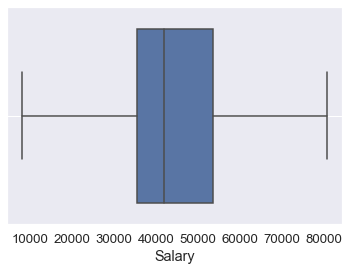

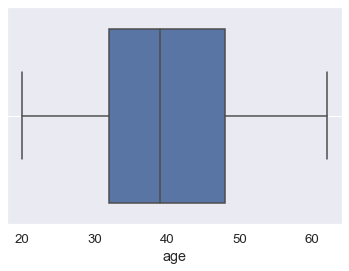

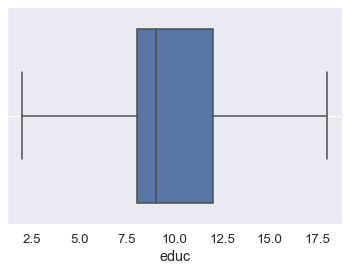

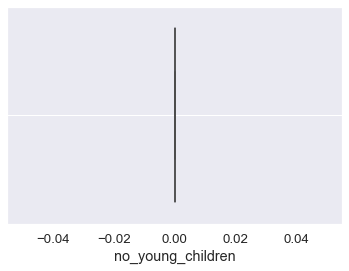

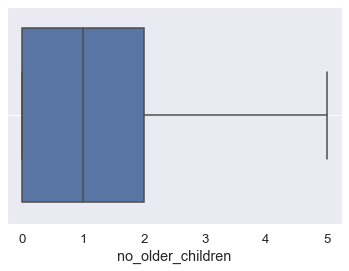

In [653]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(hol[i])
    plt.grid()
    plt.show();

In [226]:
hol.skew()

Salary               0.710966
age                  0.146412
educ                -0.095087
no_young_children    0.000000
no_older_children    0.872881
dtype: float64

In [ ]:
### One hot Encoding to convert string data to numerical values

In [654]:
hol_dummy = pd.get_dummies(hol,drop_first=True)
hol_dummy.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [655]:
hol_dummy.Holliday_Package_yes.value_counts()

0    471
1    401
Name: Holliday_Package_yes, dtype: int64

In [ ]:
## Dropping no_young_children variable considering about 75% of the variable is 0 values and it also capped by outlier treatment above by 0s.

In [656]:
hol_dummy.drop('no_young_children',axis=1,inplace=True)

In [657]:
hol_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                872 non-null    float64
 1   age                   872 non-null    float64
 2   educ                  872 non-null    float64
 3   no_older_children     872 non-null    float64
 4   Holliday_Package_yes  872 non-null    uint8  
 5   foreign_yes           872 non-null    uint8  
dtypes: float64(4), uint8(2)
memory usage: 29.1 KB


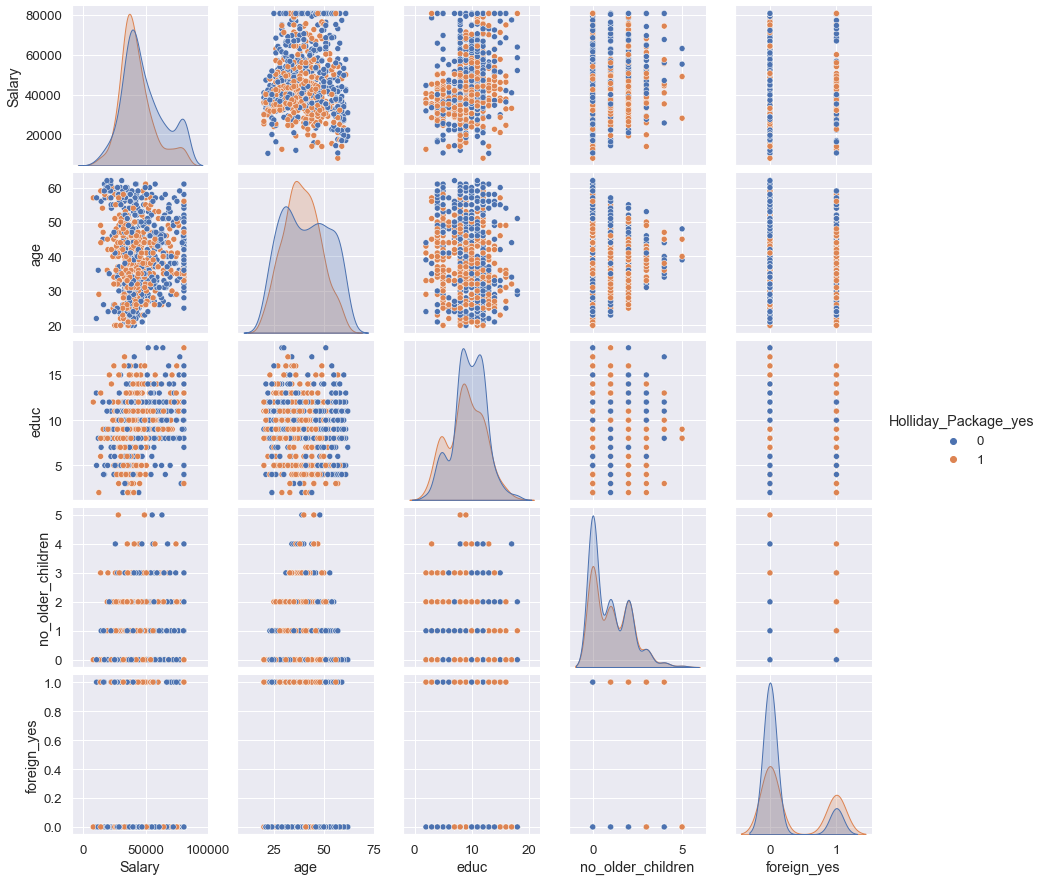

In [240]:
# Pairplot using sns
sns.pairplot(hol_dummy ,diag_kind='kde' ,hue='Holliday_Package_yes');

Those attributes whose density distribution is overlapping are poor predictors,whose density distribution is slight variances they are weak predictors,here 
salary and age could help.scatter plots also overlap each other

In [241]:
corr=hol_dummy.corr()
corr

,Salary,age,educ,no_older_children,Holliday_Package_yes,foreign_yes
Salary,1.000000,0.047029,0.352913,0.124030,-0.180214,-0.239387
age,0.047029,1.000000,-0.149682,-0.117754,-0.092311,-0.107148
educ,0.352913,-0.149682,1.000000,-0.035656,-0.101116,-0.420922
no_older_children,0.124030,-0.117754,-0.035656,1.000000,0.078691,0.022729
Holliday_Package_yes,-0.180214,-0.092311,-0.101116,0.078691,1.000000,0.254096
foreign_yes,-0.239387,-0.107148,-0.420922,0.022729,0.254096,1.000000


<AxesSubplot:>

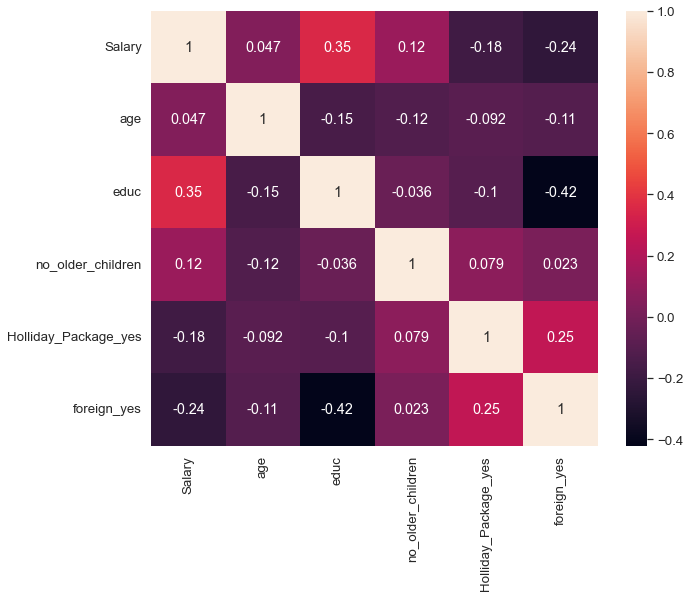

In [242]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(hol_dummy.corr(),annot=True)

In [244]:
hol_dummy.head()

,Salary,age,educ,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,1.0,0,0
1,37207.0,45.0,8.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0,0
4,66734.0,44.0,12.0,2.0,0,0


In [658]:
# Copy all the predictor variables into X dataframe
X = hol_dummy.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = hol_dummy['Holliday_Package_yes']

In [249]:
y.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package_yes, dtype: float64

In [659]:
X.head()

,Salary,age,educ,no_older_children,foreign_yes
0,48412.0,30.0,8.0,1.0,0
1,37207.0,45.0,8.0,1.0,0
2,58022.0,46.0,9.0,0.0,0
3,66503.0,31.0,11.0,0.0,0
4,66734.0,44.0,12.0,2.0,0


In [253]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package_yes, dtype: uint8

In [660]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [661]:
y_train.value_counts()

0    329
1    281
Name: Holliday_Package_yes, dtype: int64

In [507]:
y_train.value_counts(normalize=True)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [265]:
y_test.value_counts(normalize=True)

0    0.541985
1    0.458015
Name: Holliday_Package_yes, dtype: float64

In [662]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

0.5393442622950819
[[329   0]
 [281   0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610



In [269]:
ytrain_predict_prob=model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.550913,0.449087
1,0.552594,0.447406
2,0.542596,0.457404
3,0.557216,0.442784
4,0.543229,0.456771


###From the above results it is clear that, model is not able to predict postives(1s) probability with the inbuilt threshold of 0.5.
We can also observe from proba values that all positive probabilities seems to be below 0.5.
So it is required to adjust the threshold in order to improve the prediction scope for the model.
Threshold cut off for a range of 0.1-0.7 were tested and 0.4 wes finalized.

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [663]:
### Threshold 0.4 for train data

ytrain_predicted_prob_one = model.predict_proba(X_train)[:,1]
train_prediction = []
for j in ytrain_predicted_prob_one:
        if j > 0.4:
            train_prediction.append(1)
        else:
            train_prediction.append(0)
        print('The Cut off probability value is ', 0.4)        
        print("End")

The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  

In [369]:
pd.DataFrame(train_prediction).head()

,0
0,1
1,1
2,1
3,1
4,1


In [471]:
pd.DataFrame(train_prediction).value_counts()

1    561
0     49
dtype: int64

In [664]:
LR_train_acc=model.score(X_train, y_train)
LR_train_acc

0.5393442622950819

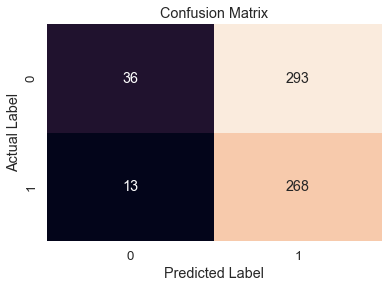

In [665]:
## Confusion matrix on train data
sns.heatmap(confusion_matrix(y_train,train_prediction),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [666]:
### ModelScore,Confusion_Matrix,Classification_Report for Train Data with threshold 0.4

print(metrics.classification_report(y_train, train_prediction))

              precision    recall  f1-score   support

           0       0.73      0.11      0.19       329
           1       0.48      0.95      0.64       281

    accuracy                           0.50       610
   macro avg       0.61      0.53      0.41       610
weighted avg       0.62      0.50      0.40       610



In [667]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
LR_metrics=classification_report(y_train,train_prediction,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
LR_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
LR_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, Third value(2) which is f1 score and with
# 2 decimal digit
LR_train_f1=round(df.loc["1"][2],2)


print ('LR_train_precision ',LR_train_precision)
print ('LR_train_recall ',LR_train_recall)
print ('LR_train_f1 ',LR_train_f1)

LR_train_precision  0.48
LR_train_recall  0.95
LR_train_f1  0.64


In [668]:
### Threshold 0.4 for test data
ytest_predicted_prob_one = model.predict_proba(X_test)[:,1]
test_prediction = []
for j in ytest_predicted_prob_one:
        if j > 0.4:
            test_prediction.append(1)
        else:
            test_prediction.append(0)
        print('The Cut off probability value is ', 0.4)        
        print("End")

The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  0.4
End
The Cut off probability value is  

In [669]:
LR_test_acc=model.score(X_test, y_test)
LR_test_acc

0.5419847328244275

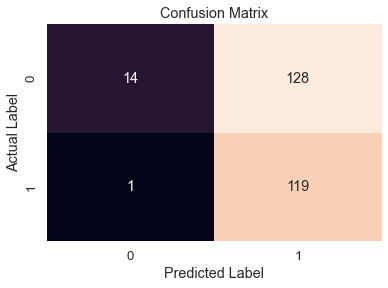

In [670]:
## Confusion matrix on test data
sns.heatmap(confusion_matrix(y_test,test_prediction),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [671]:

print(metrics.classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.93      0.10      0.18       142
           1       0.48      0.99      0.65       120

    accuracy                           0.51       262
   macro avg       0.71      0.55      0.41       262
weighted avg       0.73      0.51      0.39       262



In [672]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
LR_metrics=classification_report(y_test, test_prediction,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
LR_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
LR_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, Third value(2) which is f1 score and with
# 2 decimal digit
LR_test_f1=round(df.loc["1"][2],2)


print ('LR_test_precision ',LR_test_precision)
print ('LR_test_recall ',LR_test_recall)
print ('LR_test_f1 ',LR_test_f1)

LR_test_precision  0.48
LR_test_recall  0.99
LR_test_f1  0.65


### Threshold cutoff probability test

In [329]:
np.arange(0.,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [330]:
predicted_prob_one = model.predict_proba(X_train)[:,1]

In [334]:
pd.DataFrame(predicted_prob_one).head()

,0
0,0.449087
1,0.447406
2,0.457404
3,0.442784
4,0.456771


In [351]:
np.arange(0.1,0.5,0.1) 

array([0.1, 0.2, 0.3, 0.4])

In [ ]:
ytrain_predict_prob=model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

In [355]:
train_predicted_prob_one = model.predict_proba(X_train)[:,1]
pd.DataFrame(train_predicted_prob_one).max()

0    0.489376
dtype: float64

The Cut off probability value is  0.1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       329
           1       0.46      1.00      0.63       281

    accuracy                           0.46       610
   macro avg       0.23      0.50      0.32       610
weighted avg       0.21      0.46      0.29       610

End
[[  0 329]
 [  0 281]]


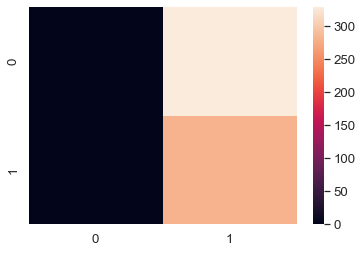

The Cut off probability value is  0.2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       329
           1       0.46      1.00      0.63       281

    accuracy                           0.46       610
   macro avg       0.23      0.50      0.32       610
weighted avg       0.21      0.46      0.29       610

End
[[  0 329]
 [  0 281]]


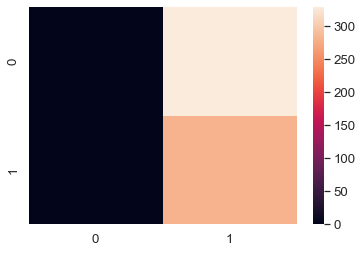

The Cut off probability value is  0.30000000000000004
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       329
           1       0.46      1.00      0.63       281

    accuracy                           0.46       610
   macro avg       0.23      0.50      0.32       610
weighted avg       0.21      0.46      0.29       610

End
[[  0 329]
 [  0 281]]


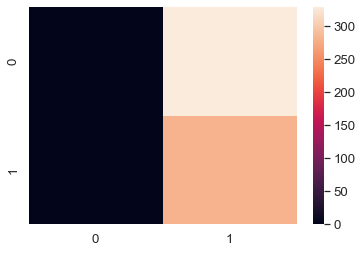

The Cut off probability value is  0.4
              precision    recall  f1-score   support

           0       0.73      0.11      0.19       329
           1       0.48      0.95      0.64       281

    accuracy                           0.50       610
   macro avg       0.61      0.53      0.41       610
weighted avg       0.62      0.50      0.40       610

End
[[ 36 293]
 [ 13 268]]


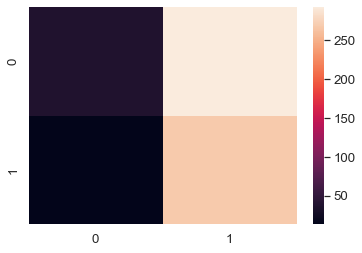

The Cut off probability value is  0.5
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610

End
[[329   0]
 [281   0]]


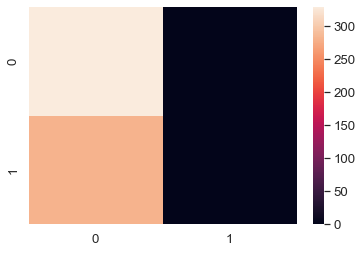

The Cut off probability value is  0.6
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610

End
[[329   0]
 [281   0]]


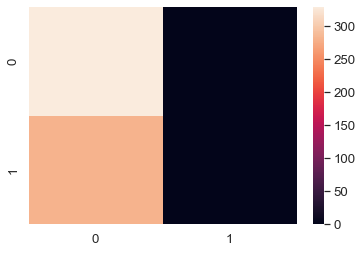

In [357]:
for i in np.arange(0.1,0.7,0.1):
    train_prediction = []
    for j in train_predicted_prob_one:
        if j > i:
            train_prediction.append(1)
        else:
            train_prediction.append(0)
    print('The Cut off probability value is ', i)        
    print(classification_report(y_train, train_prediction))
    print("End")
    print(confusion_matrix(y_train, train_prediction))
    sns.heatmap(confusion_matrix(y_train,train_prediction))
    plt.show()
    

In [427]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).max()

0    0.604221
1    0.481500
dtype: float64

In [363]:
test_predicted_prob_one = model.predict_proba(X_test)[:,1]
pd.DataFrame(test_predicted_prob_one).max()

0    0.4815
dtype: float64

The Cut off probability value is  0.1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.46      1.00      0.63       120

    accuracy                           0.46       262
   macro avg       0.23      0.50      0.31       262
weighted avg       0.21      0.46      0.29       262

End
[[  0 142]
 [  0 120]]


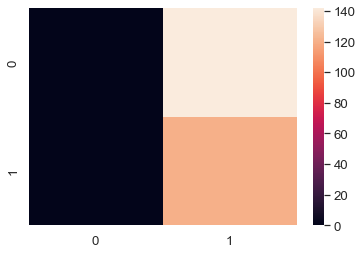

The Cut off probability value is  0.2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.46      1.00      0.63       120

    accuracy                           0.46       262
   macro avg       0.23      0.50      0.31       262
weighted avg       0.21      0.46      0.29       262

End
[[  0 142]
 [  0 120]]


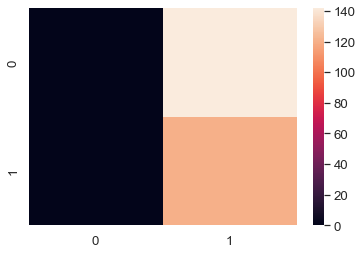

The Cut off probability value is  0.30000000000000004
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.46      1.00      0.63       120

    accuracy                           0.46       262
   macro avg       0.23      0.50      0.31       262
weighted avg       0.21      0.46      0.29       262

End
[[  0 142]
 [  0 120]]


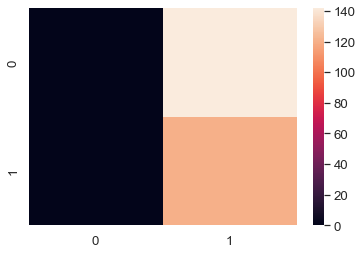

The Cut off probability value is  0.4
              precision    recall  f1-score   support

           0       0.93      0.10      0.18       142
           1       0.48      0.99      0.65       120

    accuracy                           0.51       262
   macro avg       0.71      0.55      0.41       262
weighted avg       0.73      0.51      0.39       262

End
[[ 14 128]
 [  1 119]]


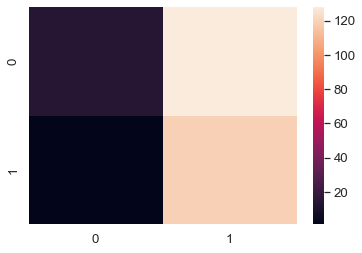

The Cut off probability value is  0.5
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262

End
[[142   0]
 [120   0]]


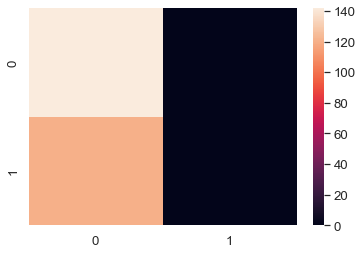

The Cut off probability value is  0.6
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262

End
[[142   0]
 [120   0]]


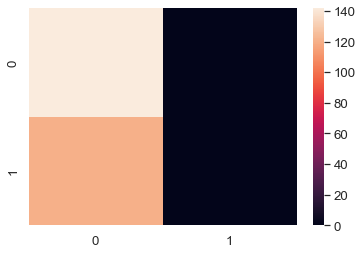

In [394]:
for i in np.arange(0.1,0.7,0.1):
    test_prediction = []
    for j in test_predicted_prob_one:
        if j > i:
            test_prediction.append(1)
        else:
            test_prediction.append(0)
    print('The Cut off probability value is ', i)        
    print(classification_report(y_test, test_prediction))
    print("End")
    print(confusion_matrix(y_test, test_prediction))
    sns.heatmap(confusion_matrix(y_test,test_prediction))
    plt.show()

AUC: 0.675


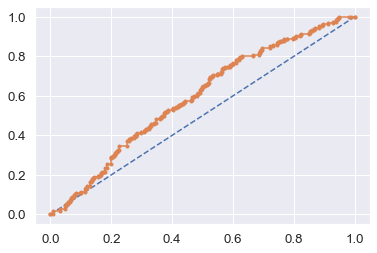

In [588]:
# AUC and ROC for the training data

# predict probabilities
# keep probabilities for the positive outcome only
probs = model.predict_proba(X_train)[:,1]
# calculate AUC
from sklearn.metrics import roc_auc_score
LR_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.675


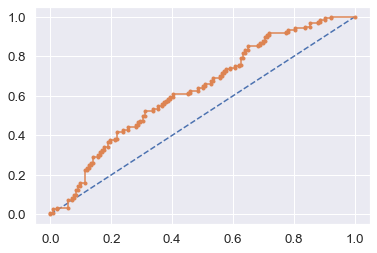

In [673]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
LR_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [402]:
import statsmodels.formula.api as smf
lm = smf.logit('Holliday_Package_yes~Salary+age+educ+no_older_children+foreign_yes',data=hol_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.642449
         Iterations 5


In [404]:
print(lm.summary())

                            Logit Regression Results                            
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      866
Method:                             MLE   Df Model:                            5
Date:                  Sun, 19 Jun 2022   Pseudo R-squ.:                 0.06881
Time:                          15:44:31   Log-Likelihood:                -560.22
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 2.184e-16
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3928      0.463      0.849      0.396      -0.514       1.300
Salary            -2.122e-05   5.12e-06     -4.146      0.000   -3.13e-05   -1.12e-05
age     

# LDA MODEL

In [590]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
train_predict = lda.predict(X_train)
test_predict = lda.predict(X_test)

In [534]:
### Classification report on train data

print(classification_report(y_train, train_predict))


              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



In [535]:
LDA_metrics=classification_report(y_train, train_predict, output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][0],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_f1=round(df.loc["1"][2],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.65
LDA_train_recall  0.44
LDA_train_f1  0.52


In [536]:
### Classification report on test data
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



In [537]:
LDA_metrics=classification_report(y_test, test_predict, output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][0],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_f1=round(df.loc["1"][2],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.69
LDA_test_recall  0.45
LDA_test_f1  0.55


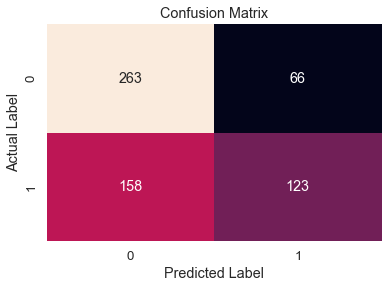

In [553]:
## Confusion matrix on train data
sns.heatmap(confusion_matrix(y_train,train_predict),annot=True, fmt='d', cbar=False,)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

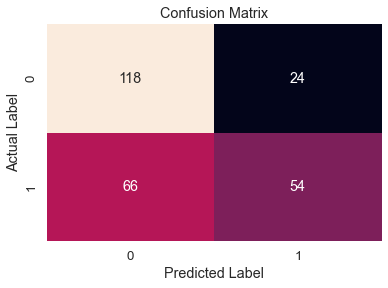

In [554]:
## Confusion matrix on test data
sns.heatmap(confusion_matrix(y_test,test_predict),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [540]:
LDA_train_acc = lda.score(X_train, y_train)
print(LDA_train_acc)

0.6327868852459017


In [541]:
LDA_test_acc = lda.score(X_test, y_test)
print(LDA_test_acc)

0.6564885496183206


In [497]:
ytest_predict_prob=lda.predict_proba(X_test)

pd.DataFrame(ytest_predict_prob).max()

0    0.825940
1    0.797369
dtype: float64

AUC: 0.675


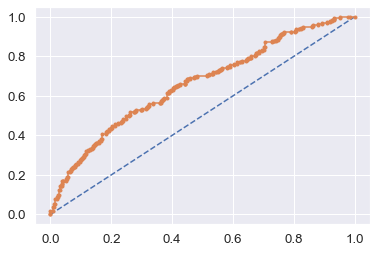

In [591]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
LDA_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.675


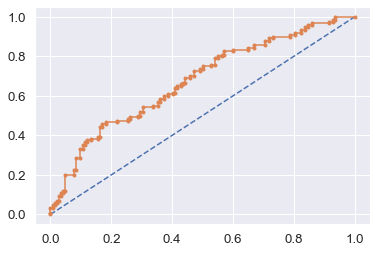

In [592]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
LDA_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Final model

In [593]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[LR_train_acc,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
        'LR Test':[LR_test_acc,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
       },index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.54,0.54,0.63,0.66
AUC,0.59,0.63,0.66,0.68
Recall,0.43,0.50,0.44,0.45
Precision,0.54,0.58,0.65,0.69
F1 Score,0.48,0.54,0.52,0.55


## ROC Curve for the 3 models on the Training data

NameError: name 'LR_train_fpr' is not defined

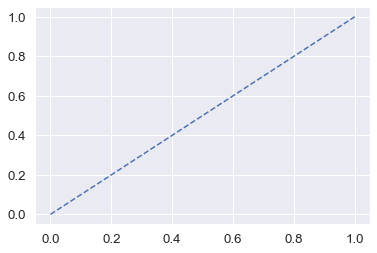

In [543]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_train_fpr, LR_train_tpr,color='red',label="LR")
plt.plot(LDA_train_fpr,LDA_train_tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')